<a href="https://colab.research.google.com/github/priyankakusupudi/DataVizFall2020/blob/master/Copy_of_Class_Activity_Lec03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualize New York times database for COVID-19
## Case study Bristol and Suffolk, MA

## Loading US County Level Data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [63]:
# https://github.com/nytimes/covid-19-data repository location
db = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv"
## loading data into dataframe

df = pd.read_csv(db)


# Explore data

In [ ]:
df.head(5)

,date,state,fips,cases,deaths
county,,,,,
Snohomish,2020-01-21,Washington,53061.0,1,0
Snohomish,2020-01-22,Washington,53061.0,1,0
Snohomish,2020-01-23,Washington,53061.0,1,0
Cook,2020-01-24,Illinois,17031.0,1,0
Snohomish,2020-01-24,Washington,53061.0,1,0


In [ ]:
df.nunique()


date        233
county     1921
state        55
fips       3203
cases     15918
deaths     2375
dtype: int64

In [ ]:
# let us get fips for 2 counties  (Bristol and Suffolk, MA)
## fips stands for : Federal Information Processing Standards
df = pd.read_csv(db, index_col= "county")
r = df.query(('county == "Bristol" or county == "Suffolk"')and ('fips == 25005.0 or fips == 25025.0') and 'state == "Massachusetts" ' , inplace = False)
x = r.loc[["Bristol","Suffolk"],["fips"]]
y = x.drop_duplicates(subset=['fips'])
print(y)

            fips
county          
Bristol  25005.0
Suffolk  25025.0


In [ ]:
df = pd.read_csv(db, index_col= "date")
r = df.query('county == "Bristol" and state == "Massachusetts" ' , inplace = False)
re = r.loc[:, ["county","state","cases","deaths"]]
get_county_stat = re.iloc[0:5,[ True, True,True,True]]
print(get_county_stat)

             county          state  cases  deaths
date                                             
2020-03-14  Bristol  Massachusetts      1       0
2020-03-15  Bristol  Massachusetts      1       0
2020-03-16  Bristol  Massachusetts      2       0
2020-03-17  Bristol  Massachusetts      5       0
2020-03-18  Bristol  Massachusetts      5       0


## Explore data type

In [ ]:
#df_Bristol = get_county_stat(df,25005)
#df_Suffolk = get_county_stat(df,25025)


df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518297 entries, 0 to 518296
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    518297 non-null  object 
 1   county  518297 non-null  object 
 2   state   518297 non-null  object 
 3   fips    513310 non-null  float64
 4   cases   518297 non-null  int64  
 5   deaths  518297 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 23.7+ MB


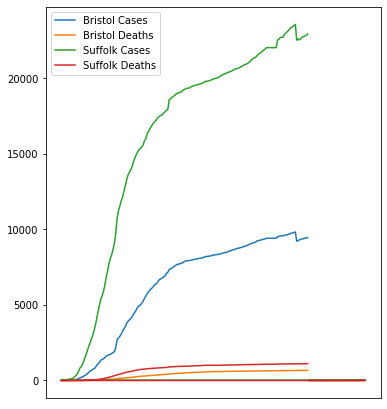

In [92]:
df = pd.read_csv(db)
df_bristol = df[(df['county'] == 'Bristol') & (df['state'] == 'Massachusetts')]
df_suffolk = df[(df['county'] == 'Suffolk') & (df['state'] == 'Massachusetts')]
f,ax = plt.subplots(1,1,figsize=(6,8))
ax.plot(df_bristol['date'],df_bristol['cases'],label = 'Bristol Cases')
ax.plot(df_bristol['date'],df_bristol['deaths'],label = 'Bristol Deaths')
ax.plot(df_suffolk['date'],df_suffolk['cases'],label = 'Suffolk Cases')
ax.plot(df_suffolk['date'],df_suffolk['deaths'],label = 'Suffolk Deaths')
ax.legend()
formatter = mdates.DateFormatter('%Y-%m-%d')
locator = mdates.DayLocator()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
f.autofmt_xdate(rotation=45)



In [ ]:

r=df.groupby("county")["deaths","cases"].max().sort_values(by=('cases'),ascending = False)
r.head(10)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,deaths,cases
county,,
Los Angeles,6090,249859
New York City,23744,241351
Miami-Dade,2740,162432
Maricopa,3116,136324
Cook,5100,132401
Harris,2363,112762
Dallas,1021,77734
Broward,1244,73696
Clark,1223,61642


## Top 10 counties by number of cases and deaths 



```
# This is formatted as code
```





## Death rate Per FIPS 

In [96]:
data = df_str[df_str['fips'].notnull()][['fips','deaths']]
data.set_index(data["fips"],inplace=True)
data.head(4)



,fips,deaths
fips,,
53061.0,53061.0,0
53061.0,53061.0,0
53061.0,53061.0,0
17031.0,17031.0,0


In [97]:

d= data.copy().resample('Y').sum()['deaths'].to_frame(name='deathRate')
d["fips"]= d.index
 
fig = px.bar(d , x="fips", y="deaths"
,title="Death Rate per FIPS"
, range_y=[125000,155000]
, barmode="group"
)
fig.show()

TypeError: ignored

## <font color = red> Bonus Point</font>

### A function that makes "Folium Choropleth Map" for Weekly Cases, Weekly Deaths and Weekly Mortality Rate </font>

ALL COUNTIES

<br>

### def Folium_Choropleth(type = 'cases',date=''):

<br>

## Due for Bonus point : Friday (09/11/2020 11:59pm)